<a href="https://colab.research.google.com/drive/1TPlDVlWCwfXB0lbTJLNnHCoFwIjVgoNH?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

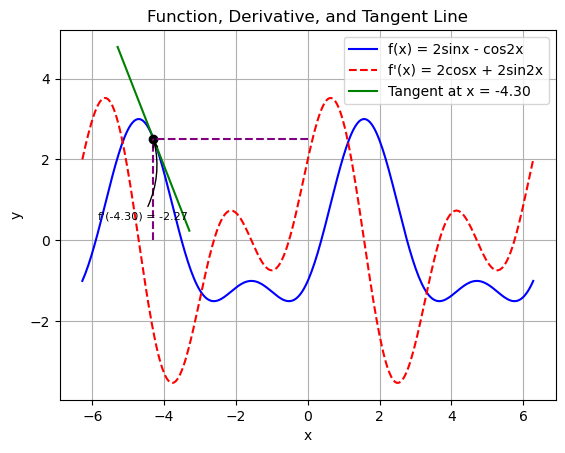

In [213]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x : 2 * np.sin(x) - np.cos(2 * x)
df = lambda x : 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(p):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 300)
    tang = lambda x, p : f(p) + df(p) * (x - p)

    plt.plot(x, f(x), 'b', label = r'f(x) = 2sinx - cos2x')
    plt.plot(x, df(x), 'r--', label = r"f'(x) = 2cosx + 2sin2x")
    plt.plot([p-1, p+1], [tang(p-1, p), tang(p+1, p)], 'g', label = f'Tangent at x = {p:.2f}')

    plt.scatter([p], [f(p)], color = 'k', zorder = 2)
    plt.vlines(p, 0, f(p), linestyle = 'dashed', color = 'purple')
    plt.hlines(f(p), 0, p, linestyle = 'dashed', color = 'purple')
    plt.annotate(f"f'({p:.2f}) = {df(p):.2f}",
                 xy = (p, f(p)),
                 xytext = (p - 0.3, f(p) - 2),
                 arrowprops = dict(facecolor = 'black', arrowstyle = '->', connectionstyle = "arc3,rad=0.2"),
                 fontsize = 8, ha = 'center')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function, Derivative, and Tangent Line')
    plt.legend()
    plt.grid(True)

    plt.show()
    
beauty_derivative_plot(-4.3)

## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

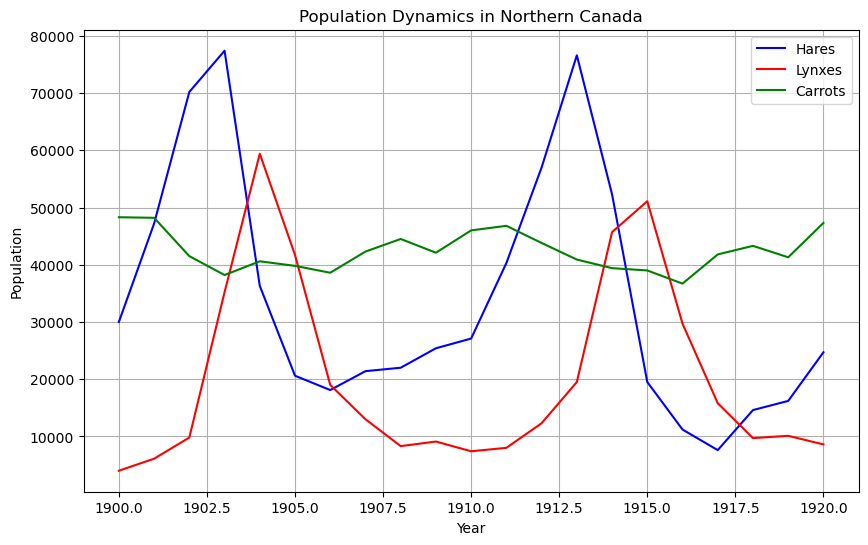

In [4]:

# Загружаем данные
data = np.loadtxt('populations.txt')

# Разделяем
years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'g-', label='Carrots')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Dynamics in Northern Canada')
plt.legend()
plt.grid(True)

plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

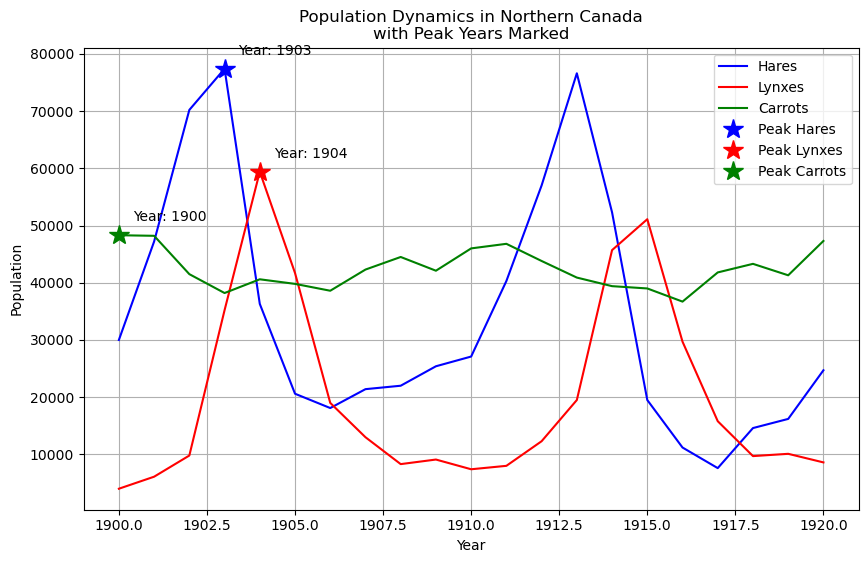

In [13]:

# Ищем максимум по популяциям у всех животных и соответствующие года
peak_hare_year = years[np.argmax(hares)]
peak_lynx_year = years[np.argmax(lynxes)]
peak_carrot_year = years[np.argmax(carrots)]

peak_hare_pop = np.max(hares)
peak_lynx_pop = np.max(lynxes)
peak_carrot_pop = np.max(carrots)

plt.figure(figsize=(10, 6))

plt.plot(years, hares, 'b-', label='Hares')
plt.plot(years, lynxes, 'r-', label='Lynxes')
plt.plot(years, carrots, 'g-', label='Carrots')

# Создаём точки
plt.plot(peak_hare_year, peak_hare_pop, 'b*', markersize=15, label='Peak Hares')
plt.plot(peak_lynx_year, peak_lynx_pop, 'r*', markersize=15, label='Peak Lynxes')
plt.plot(peak_carrot_year, peak_carrot_pop, 'g*', markersize=15, label='Peak Carrots')

# Подписываем точки
plt.annotate(f'Year: {int(peak_hare_year)}', 
            xy=(peak_hare_year, peak_hare_pop), 
            xytext=(10, 10), textcoords='offset points')
plt.annotate(f'Year: {int(peak_lynx_year)}', 
            xy=(peak_lynx_year, peak_lynx_pop), 
            xytext=(10, 10), textcoords='offset points')
plt.annotate(f'Year: {int(peak_carrot_year)}', 
            xy=(peak_carrot_year, peak_carrot_pop), 
            xytext=(10, 10), textcoords='offset points')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Dynamics in Northern Canada\nwith Peak Years Marked')
plt.legend()
plt.grid(True)

plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

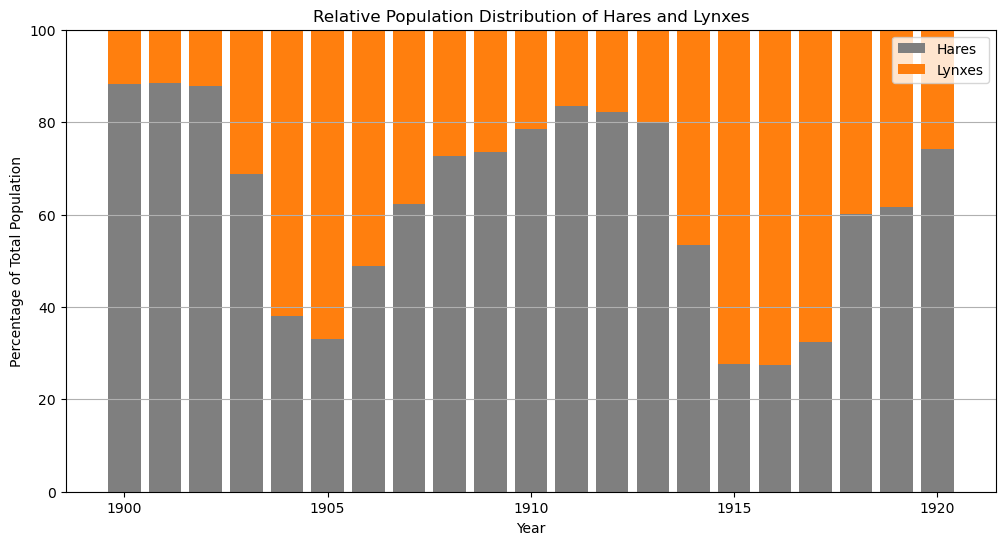

In [23]:

# Считаем проценты
total = hares + lynxes
hares_percent = (hares / total) * 100
lynxes_percent = (lynxes / total) * 100

plt.figure(figsize=(12, 6))

# Делаем колонки
plt.bar(years, hares_percent, label='Hares', color='C7')
plt.bar(years, lynxes_percent, bottom=hares_percent, label='Lynxes', color='C1')

plt.xlabel('Year')
plt.ylabel('Percentage of Total Population')
plt.title('Relative Population Distribution of Hares and Lynxes')
plt.legend()

# Рисуем координатные линии по Y
plt.grid(True, axis='y')
plt.ylim(0, 100)

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

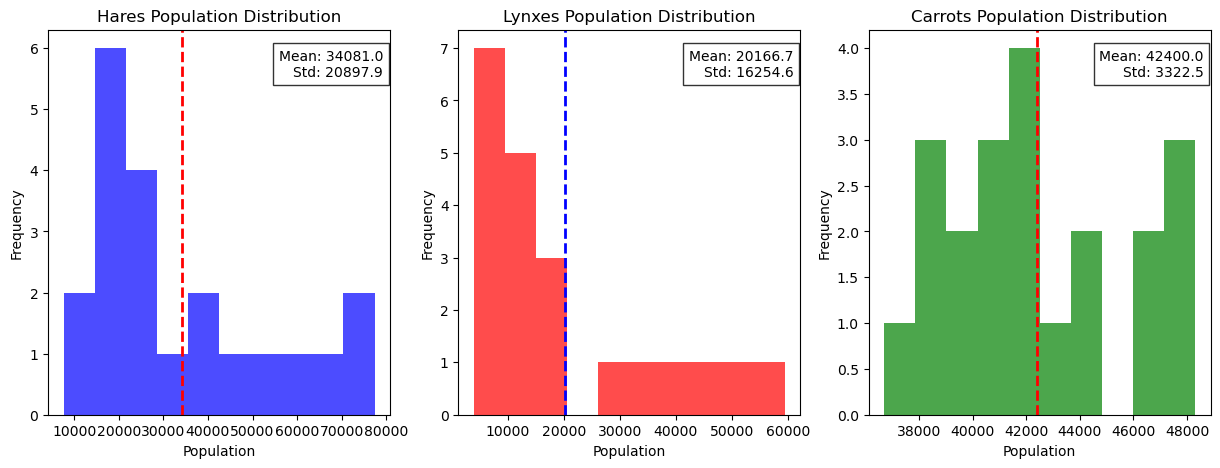

In [37]:

# Считаем статистику
hares_mean, hares_std = np.mean(hares), np.std(hares)
lynxes_mean, lynxes_std = np.mean(lynxes), np.std(lynxes)
carrots_mean, carrots_std = np.mean(carrots), np.std(carrots)

# Создаём 3 графика
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# График для кроликов
ax1.hist(hares, bins=10, color='blue', alpha=0.7)
ax1.axvline(hares_mean, color='red', linestyle='dashed', linewidth=2)
ax1.set_title('Hares Population Distribution')
ax1.set_xlabel('Population')
ax1.set_ylabel('Frequency')
ax1.text(0.98, 0.95, f'Mean: {hares_mean:.1f}\nStd: {hares_std:.1f}', 
         transform=ax1.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

# Рыси
ax2.hist(lynxes, bins=10, color='red', alpha=0.7)
ax2.axvline(lynxes_mean, color='blue', linestyle='dashed', linewidth=2)
ax2.set_title('Lynxes Population Distribution')
ax2.set_xlabel('Population')
ax2.set_ylabel('Frequency')
ax2.text(0.98, 0.95, f'Mean: {lynxes_mean:.1f}\nStd: {lynxes_std:.1f}', 
         transform=ax2.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

# Морковь 
ax3.hist(carrots, bins=10, color='green', alpha=0.7)
ax3.axvline(carrots_mean, color='red', linestyle='dashed', linewidth=2)
ax3.set_title('Carrots Population Distribution')
ax3.set_xlabel('Population')
ax3.set_ylabel('Frequency')
ax3.text(0.98, 0.95, f'Mean: {carrots_mean:.1f}\nStd: {carrots_std:.1f}', 
         transform=ax3.transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Sequence of dominant species: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


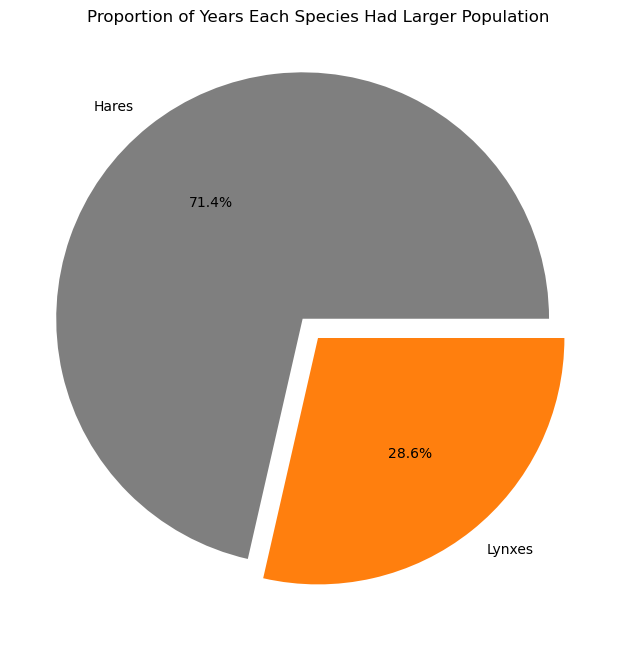

In [43]:

# Сравниваем популяции и создаём массив
dominant_species = ['H' if h > l else 'L' for h, l in zip(hares, lynxes)]

print("Sequence of dominant species:", dominant_species)

h_count = dominant_species.count('H')
l_count = dominant_species.count('L')

# Считаем доли
total = len(dominant_species)
h_percentage = (h_count / total) * 100
l_percentage = (l_count / total) * 100

plt.figure(figsize=(8, 8))
plt.pie([h_count, l_count], 
        labels=['Hares', 'Lynxes'],
        autopct='%1.1f%%',
        colors=['C7', 'C1'],
        explode=(0.1, 0))

plt.title('Proportion of Years Each Species Had Larger Population')

plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

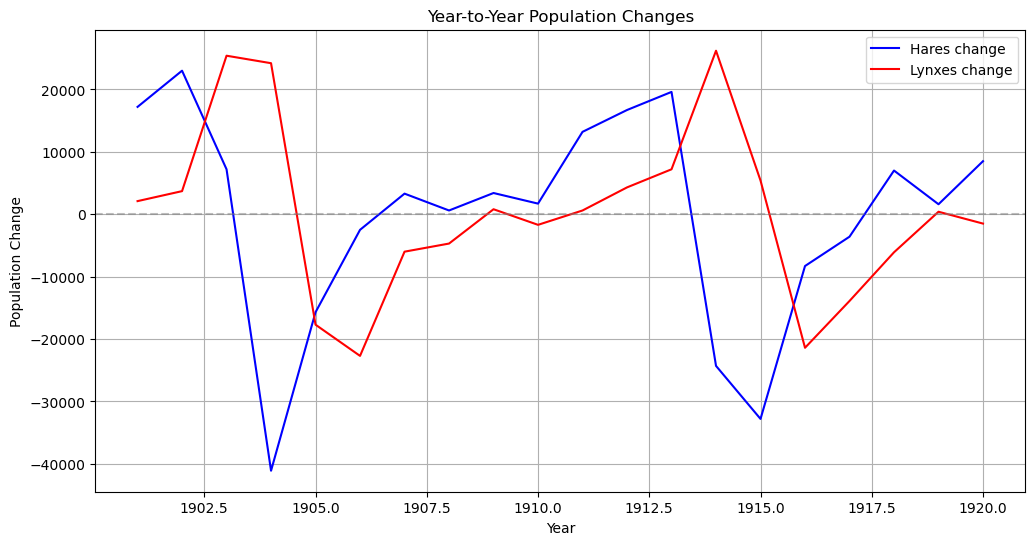

Correlation coefficient: -0.178
P-value: 0.453


In [47]:

# Считаем разницы популяции от года к году
hares_change = np.diff(hares)
lynxes_change = np.diff(lynxes)
years_change = years[1:]  # года для разниц

# Считаем коэффициенты корреляции 
correlation, p_value = stats.pearsonr(hares_change, lynxes_change)

plt.figure(figsize=(12, 6))

plt.plot(years_change, hares_change, 'b-', label='Hares change')
plt.plot(years_change, lynxes_change, 'r-', label='Lynxes change')

# Добавляем линию нуля
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title(f'Year-to-Year Population Changes')
plt.legend()
plt.grid(True)

plt.show()

print(f"Correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

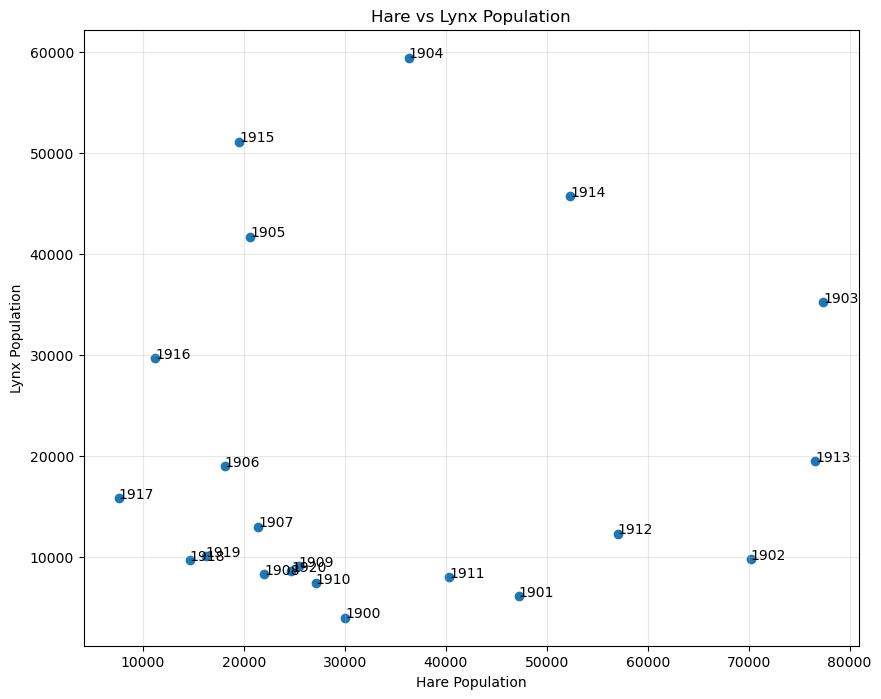

In [67]:

plt.figure(figsize=(10, 8))

# Создаём график точек
scatter = plt.scatter(hares, lynxes)

# Подписываем точки
for i, year in enumerate(years):
    plt.annotate(f'{int(year)}', 
                (hares[i], lynxes[i]),
                xytext=(0, 0), 
                textcoords='offset points')

plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hare vs Lynx Population')

plt.grid(True, alpha=0.3)

plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [79]:
def estimate_average(years, hares, target_year=1920, num_previous_years=5):
    # Находим индекс ближайшего года перед целевым
    last_idx = np.where(years < target_year)[0][-1]
    
    # Определяем начальный индекс для расчета среднего
    # Убедимся, что не выходим за пределы массива
    start_idx = max(0, last_idx - num_previous_years + 1)
    
    previous_values = hares[start_idx:last_idx + 1]
    
    average_estimate = np.mean(previous_values)

    return average_estimate

def calculate_relative_error(estimated, true_value):
    # Рассчитываем относительную ошибку
    return abs(estimated - true_value) / true_value * 100

# Ищем правильное значение
year_1920_idx = np.where(years == 1920)[0][0]
true_value = hares[year_1920_idx]

average_estimate = estimate_average(years, hares, num_previous_years=7)

relative_error = calculate_relative_error(average_estimate, true_value)

print(f"True value for 1920: {true_value:.1f}")
print(f"Estimate using average: {average_estimate:.1f}")
print(f"Relative error: {relative_error:.1f}%")

True value for 1920: 24700.0
Estimate using average: 28285.7
Relative error: 14.5%
